### El objetivo del proyecto será crear un sistema de machine learning que detecte si el cliente ha contratado un deposito a plazo

In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv("./bank-additional/bank-additional-full.csv", sep=";")

In [41]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Comprobamos el tipo de datos de cada columna

In [42]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Attribute information:

##### Bank client data:
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - default: has credit in default? (categorical: "no","yes","unknown")  
   6 - housing: has housing loan? (categorical: "no","yes","unknown")  
   7 - loan: has personal loan? (categorical: "no","yes","unknown")  
##### Related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone")  
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
##### Other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
##### Social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)      
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
  20 - nr.employed: number of employees - quarterly indicator (numeric)   
  ##### Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")  
  ##### Missing Attribute Values: 
  There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


Eliminamos la columna duration. This attribute highly affects the output target (e.g., if duration=0 then y="no")

In [43]:
df.drop("duration", axis=1, inplace=True)

## Data Cleaning
Comprobamos donde hay datos nulos

In [44]:
df = df.replace("unknown", np.nan)

In [45]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Eliminamos la columna default ya que tenía demasiados nulos

In [46]:
df.drop("default", axis=1, inplace=True)

Eliminamos las pocas filas con nulos en la columna job y marital

In [47]:
df.dropna(subset=["job", "marital", "housing", "loan"], inplace = True)

In [48]:
df.isnull().sum()

age                  0
job                  0
marital              0
education         1558
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Convertimos los valores nulos de la columna educación a unknown

In [49]:
df = df.fillna("unknown")

Convertimos las columnas de yes/no a 1/0

In [50]:
df["y"].loc[df["y"] == "yes"] = 1
df["y"].loc[df["y"] == "no"] = 0
df["housing"].loc[df["housing"] == "yes"] = 1
df["housing"].loc[df["housing"] == "no"] = 0
df["loan"].loc[df["loan"] == "yes"] = 1
df["loan"].loc[df["loan"] == "no"] = 0

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Calculamos la correlación de las columnas para eliminar aquellas que estén altamente relacionadas

In [51]:
corr = df.corr()

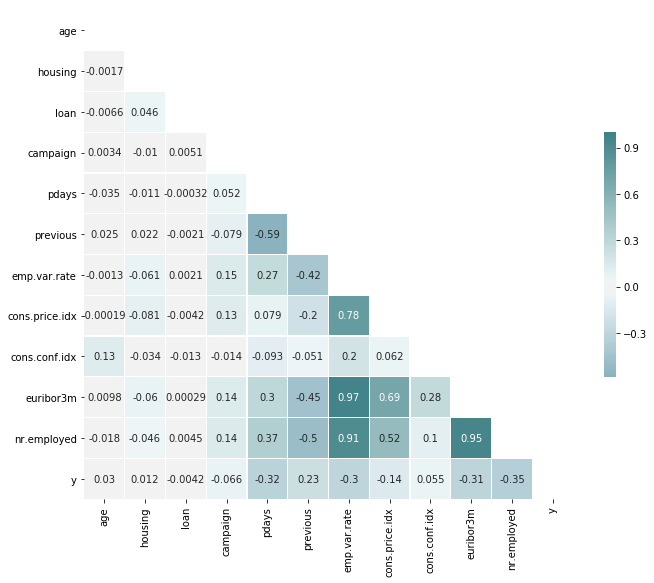

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 200, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5}, annot= True)

In [53]:
df.drop("euribor3m", axis=1, inplace=True)

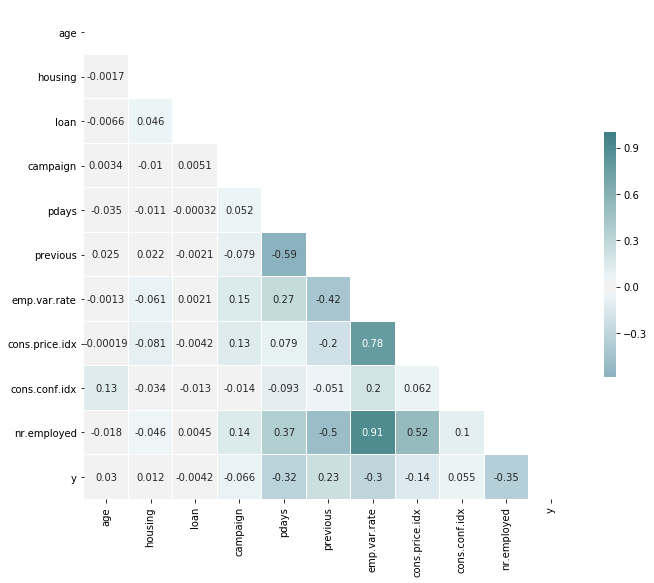

In [54]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 200, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5}, annot= True)

In [55]:
df.drop("emp.var.rate", axis=1, inplace=True)

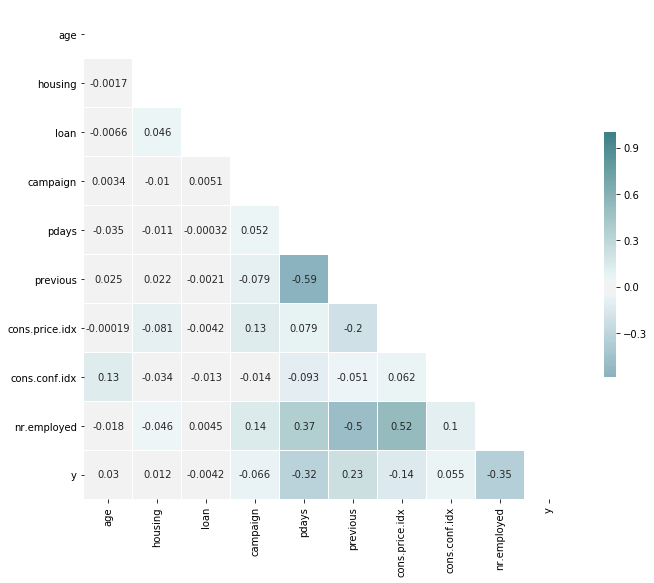

In [56]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 200, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5}, annot= True)

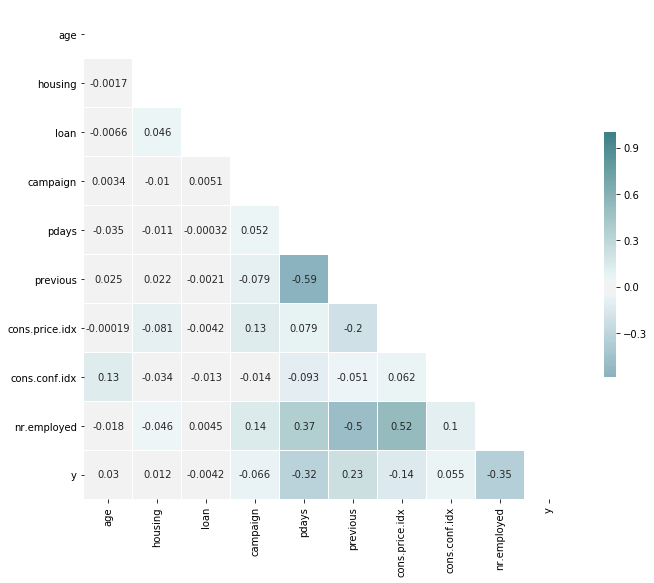

In [57]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 200, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.2, cbar_kws={"shrink": .5}, annot= True)

Vamos a asignar un valor entre -2 y 2 en función del nivel de estudios del cliente:

In [58]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [59]:
df["education"].loc[df["education"] == "illiterate"] = -2
df["education"].loc[df["education"] == "unknown"] = 0
df["education"].loc[df["education"] == "basic.4y"] = 0
df["education"].loc[df["education"] == "basic.6y"] = 0
df["education"].loc[df["education"] == "basic.9y"] = 0
df["education"].loc[df["education"] == "high.school"] = 1
df["education"].loc[df["education"] == "professional.course"] = 1
df["education"].loc[df["education"] == "university.degree"] = 2

Eliminamos la columnas de month, day_of_week y contact ya que no son datos relevantes para saber si un cliente ha contratado o no un deposito a largo plazo

In [60]:
df.drop(["month", "day_of_week", "contact"], axis=1, inplace = True)

La columna campaign contiene el número de contactos realizados durante esta campaña a cada cliente. Como hay demasiados valores diferentes de números de llamadas todos aquellos que es repetido en menos de 100 clientes, que coincide con más de 12 llamadas, vamos a sustituirlo por 13 llamadas

In [61]:
df["campaign"].loc[df["campaign"] >= 13] = 13

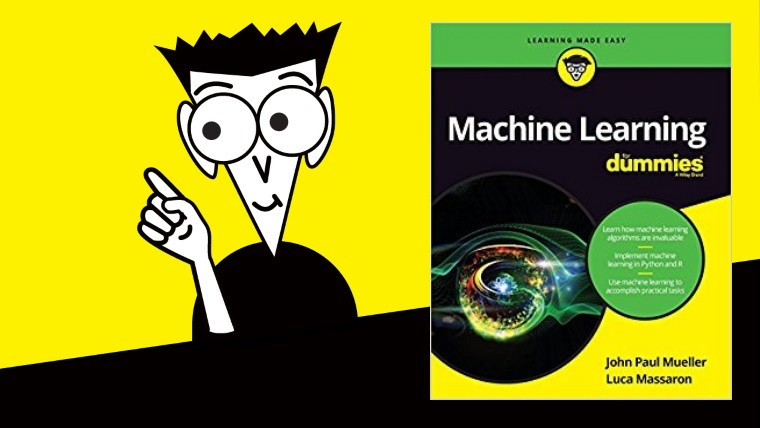

In [62]:
df_dummy = pd.get_dummies(df)

In [63]:
df_dummy.dtypes

age                       int64
education                 int64
housing                   int64
loan                      int64
campaign                  int64
pdays                     int64
previous                  int64
cons.price.idx          float64
cons.conf.idx           float64
nr.employed             float64
y                         int64
job_admin.                uint8
job_blue-collar           uint8
job_entrepreneur          uint8
job_housemaid             uint8
job_management            uint8
job_retired               uint8
job_self-employed         uint8
job_services              uint8
job_student               uint8
job_technician            uint8
job_unemployed            uint8
marital_divorced          uint8
marital_married           uint8
marital_single            uint8
poutcome_failure          uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
dtype: object

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import utils

df_dummy = utils.shuffle(df_dummy)
y = df_dummy["y"]
X = df_dummy.drop("y", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


Para saber que modelos aplicar usamos el cheat-sheet de scikit-learn

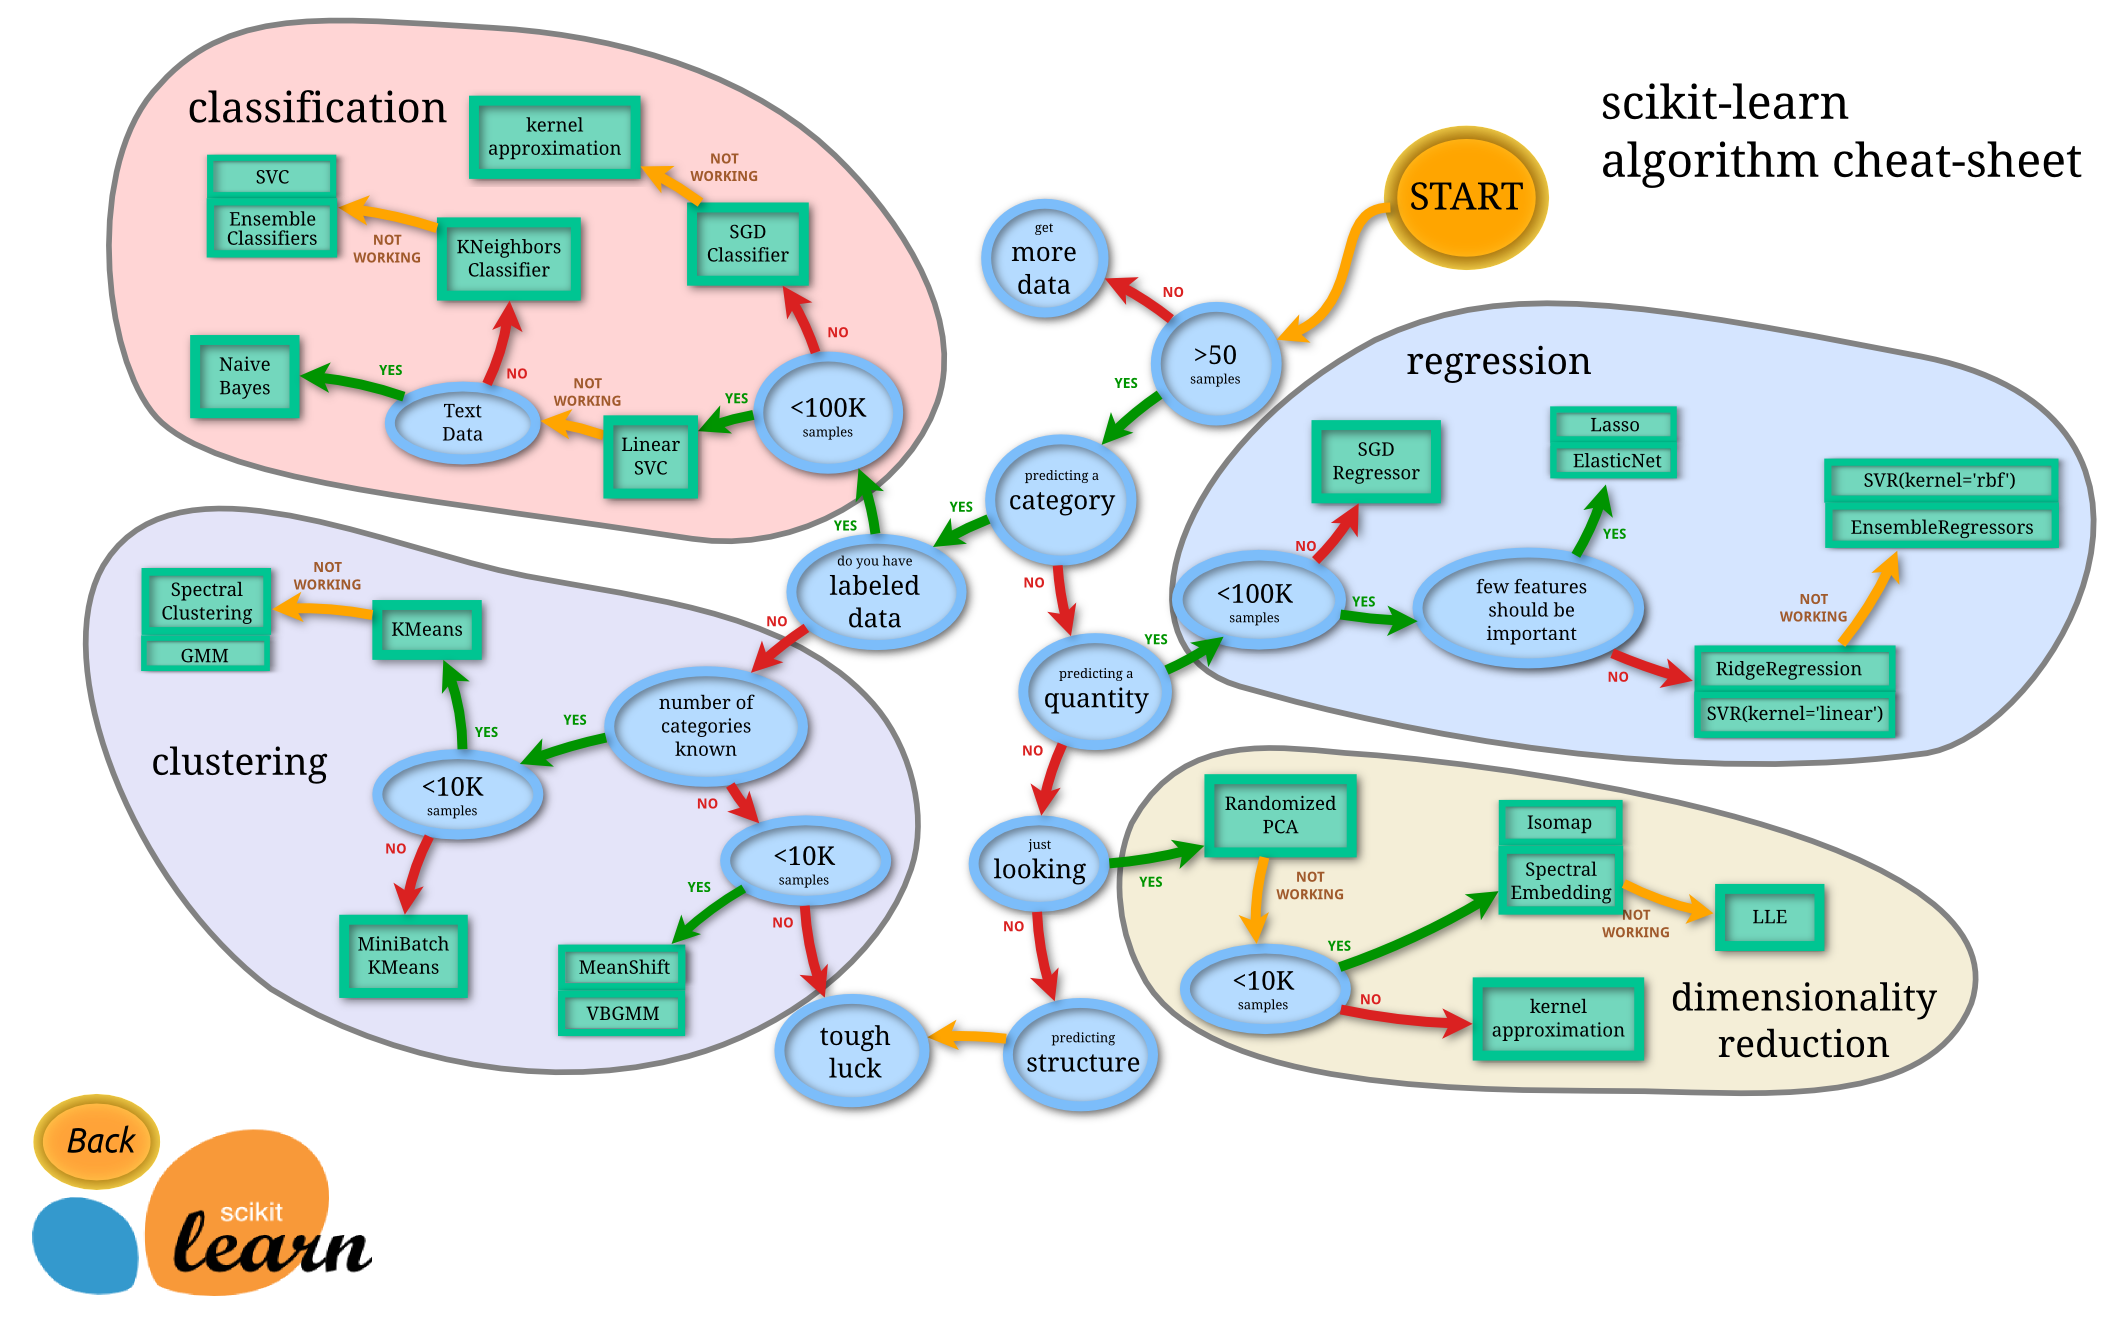

Primero probamos el modelos Linear SVC:

In [65]:
from sklearn import svm

cls = OneVsRestClassifier(svm.LinearSVC())
scores = cross_val_score(cls, X, y, cv=5)
print(scores.mean(), scores)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.897846829931607 [0.90040191 0.8953649  0.8991206  0.89849246 0.89585427]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Como el modelo LinearSVC no ha funcionado como esperabamos, siguiendo el oganigrama de la sheet, probamos el modelo KNeighborsClassifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

cls1 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(cls1, X, y, cv=5)
print(scores.mean(), scores)

0.8828983245848635 [0.88419995 0.87828162 0.8839196  0.88329146 0.88479899]


# 🤩💯🤩💯🤩💯🤩💯🤩💯🤩💯🤩

## Accuracy, Precision, Recall y F-score

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score

cls1.fit(X_train, y_train)
y_pred = cls1.predict(X_test)

balanced_score = balanced_accuracy_score(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("""Accurancy Score: {}
Balanced Accurancy Score: {}
Precision: {}
Recall: {}
F-score: {}""".format(score, balanced_score, precision, recall, f1_score))


Accurancy Score: 0.8756437633463133
Balanced Accurancy Score: 0.6078434611584451
Precision: 0.4319419237749546
Recall: 0.26010928961748636
F-score: 0.3246930422919509


## Roc curve

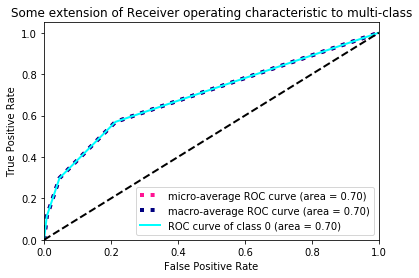

In [84]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

y = label_binarize(y, classes=[0,1])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(np.c_[X_test])[:, 1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# 🥺